# ViT Example on MNIST

Adapted from: [https://keras.io/examples/vision/image_classification_with_vision_transformer/](https://keras.io/examples/vision/image_classification_with_vision_transformer/)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def grab_npz_img(img_path):
    data = np.load(img_path)
    img = data['image']
    target = data['target']
    x = img[:,:,:]
    #x = np.expand_dims(x, axis=0)
    #x = x.reshape((x.shape[0],x.shape[1],x.shape[2],x.shape[3],1))
    return x

In [3]:
def grab_npz_target(target_path):
    data = np.load(target_path)
    target = data['target']
    y = int(target)
    return y

In [4]:
def create_dataset(folder,num_imgs,config):
    X = []
    #X = np.array(X)
    Y =[]
    #for i in range(num_imgs):
    name = ''
    if config=='train':
        name = 'train'
    elif config=='validate':
        name = 'val'
    else:
        name = 'test'
        
    count = 0
    i = 0
    while count < num_imgs:
        try:
            x = grab_npz_img('./RAVEN-10000/'+folder+'/RAVEN_%d_%s.npz'%(i,name))
            y = grab_npz_target('./RAVEN-10000/'+folder+'/RAVEN_%d_%s.npz'%(i,name))
            i += 1
        except:
            i += 1
            continue
        X.append(x)
        #X = np.concatenate(x)
        Y.append(y)
        count += 1
    X = np.array(X)
    X = np.squeeze(X)
    #X = np.expand_dims(X, axis=4)
    #X = X.reshape((X.shape[0],X.shape[2],X.shape[3],X.shape[1]))
    X = np.moveaxis(X, 1, -1)
    return X,np.array(Y)

In [5]:
def create_dataset_3d(folder,num_imgs,config):
    X = []
    #X = np.array(X)
    Y =[]
    #for i in range(num_imgs):
    
    name = ''
    if config=='train':
        name = 'train'
    elif config=='validate':
        name = 'val'
    else:
        name = 'test'
        
    count = 0
    i = 0
    while count < num_imgs:
        try:
            x = grab_npz_img('./RAVEN-10000/'+folder+'/RAVEN_%d_%s.npz'%(i,name))
            y = grab_npz_target('./RAVEN-10000/'+folder+'/RAVEN_%d_%s.npz'%(i,name))
            i += 1
        except:
            i += 1
            continue
        X.append(x)
        #X = np.concatenate(x)
        Y.append(y)
        count += 1
    X = np.array(X)
    X = np.squeeze(X)
    X = np.expand_dims(X, axis=4)
    return X,np.array(Y)

In [6]:
def scheduler(epoch, lr = 0.01, embed_dim = 8192.0, warmup_steps = 100.0):
    arg1 = tf.math.rsqrt(tf.cast(epoch,'float32'))
    arg2 = epoch * (warmup_steps ** -1.5)
    return tf.math.rsqrt(embed_dim) * tf.math.minimum(arg1,arg2)

In [7]:
folder = 'center_single'
#folder = 'in_center_single_out_center_single'
num_imgs = 5000
val_split = 0.1
x_train,y_train = create_dataset(folder,num_imgs,'train')
x_val,y_val = create_dataset(folder,num_imgs*val_split,'validate')
x_test,y_test = create_dataset(folder,num_imgs*val_split,'test')
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
#x_train /= 255
#x_val /= 255
#x_test /= 255

In [8]:
y_train = keras.utils.to_categorical(y_train ,num_classes=8)
y_val = keras.utils.to_categorical(y_val,num_classes=8)
y_test = keras.utils.to_categorical(y_test,num_classes=8)

In [9]:
'''
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
'''
display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

(5000, 160, 160, 16)

(5000, 8)

(500, 160, 160, 16)

(500, 8)

In [10]:
## Standardize the -input- data between 0.0-1.0 (real)
## instead of the default 0-255 (integer)
'''
x_train = x_train.astype('float32').reshape(x_train.shape+(1,))
x_test = x_test.astype('float32').reshape(x_test.shape+(1,))
x_train /= 255
x_test /= 255

# Convert class vector [0-9] to categorical assignments (one-hot)
# y_train = keras.utils.to_categorical(y_train, len(np.unique(y_train)))
# y_test = keras.utils.to_categorical(y_test, len(np.unique(y_test)))

display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)
'''

"\nx_train = x_train.astype('float32').reshape(x_train.shape+(1,))\nx_test = x_test.astype('float32').reshape(x_test.shape+(1,))\nx_train /= 255\nx_test /= 255\n\n# Convert class vector [0-9] to categorical assignments (one-hot)\n# y_train = keras.utils.to_categorical(y_train, len(np.unique(y_train)))\n# y_test = keras.utils.to_categorical(y_test, len(np.unique(y_test)))\n\ndisplay(x_train.shape)\ndisplay(y_train.shape)\ndisplay(x_test.shape)\ndisplay(y_test.shape)\n"

In [11]:
num_classes = 8
input_shape = (160, 160, 16)
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 64
num_epochs = 1000
image_size = 160  # We'll resize input images to this size
patch_size = 40 # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [12]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.Normalization(),
        layers.experimental.preprocessing.Resizing(image_size, image_size),
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(factor=0.02),
        layers.experimental.preprocessing.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [13]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [14]:
class PositionEmbedding(layers.Layer):
    def __init__(self, maxlen, embed_dim):
        super(PositionEmbedding, self).__init__()
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-2] # x already embedded
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        return x + positions

In [15]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    '''
    inputs = layers.Input(shape=(x_train.shape[1],
                                            x_train.shape[2],
                                            x_train.shape[3],
                                            x_train.shape[4]))
    '''
    # Augment data.
    augmented = data_augmentation(inputs)
    #augmented = inputs
    # Create patches.
    # patches = Patches(patch_size)(augmented)
    # Encode patches.
    # encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)
    
    patches = keras.layers.Conv2D(projection_dim,
                                  kernel_size=(patch_size,patch_size),
                                  strides=(patch_size,patch_size))(augmented)
    
    #augmented = keras.layers.Reshape((160, 160, 16, 1))(augmented)
    '''
    patches = keras.layers.Conv3D(projection_dim,
                                  kernel_size=(patch_size,patch_size,1),
                                  strides=(patch_size,patch_size,1))(augmented)
    '''
    patches = keras.layers.Reshape((-1,projection_dim))(patches)
    position_embedding = PositionEmbedding(patches.shape[-2],
                                           projection_dim)
    encoded_patches = position_embedding(patches)
    
    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    #representation = layers.Flatten()(representation)
    representation = layers.GlobalAveragePooling1D()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    model.summary()
    return model

In [16]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.CategoricalAccuracy(name="accuracy"),
            keras.metrics.TopKCategoricalAccuracy(4, name="top-4-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )
    scheduler_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback,scheduler_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history

In [17]:
with tf.device('/device:GPU:1'):
    vit_classifier = create_vit_classifier()
    history = run_experiment(vit_classifier)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 16 0                                            
__________________________________________________________________________________________________
data_augmentation (Sequential)  (None, 160, 160, 16) 33          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 4, 4, 64)     1638464     data_augmentation[0][0]          
__________________________________________________________________________________________________
reshape (Reshape)               (None, 16, 64)       0           conv2d[0][0]                     
______________________________________________________________________________________________

In [18]:
# Additional n epochs? - will overwrite history...
# num_epochs = 20
# history = run_experiment(vit_classifier)

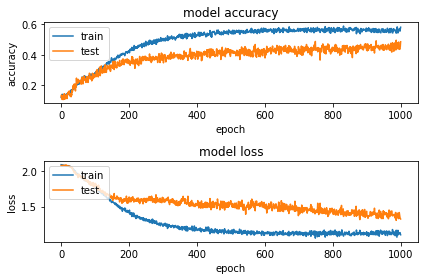

In [19]:
plt.figure(1)  
  
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left') 

plt.tight_layout()
plt.show()  

In [ ]:
with tf.device('/device:GPU:1'):
    history = run_experiment(vit_classifier)

Epoch 1/1000
71/71 [==============================] - 9s 57ms/step - loss: 1.1125 - accuracy: 0.5714 - top-4-accuracy: 0.9656 - val_loss: 1.2996 - val_accuracy: 0.4820 - val_top-4-accuracy: 0.9560
Epoch 2/1000
71/71 [==============================] - 3s 42ms/step - loss: 1.0759 - accuracy: 0.5816 - top-4-accuracy: 0.9733 - val_loss: 1.2632 - val_accuracy: 0.4900 - val_top-4-accuracy: 0.9680
Epoch 3/1000
71/71 [==============================] - 3s 42ms/step - loss: 1.0259 - accuracy: 0.6104 - top-4-accuracy: 0.9779 - val_loss: 1.2401 - val_accuracy: 0.4800 - val_top-4-accuracy: 0.9680
Epoch 4/1000
71/71 [==============================] - 3s 42ms/step - loss: 1.0047 - accuracy: 0.6164 - top-4-accuracy: 0.9779 - val_loss: 1.2504 - val_accuracy: 0.4860 - val_top-4-accuracy: 0.9720
Epoch 5/1000
71/71 [==============================] - 3s 42ms/step - loss: 0.9782 - accuracy: 0.6325 - top-4-accuracy: 0.9785 - val_loss: 1.2464 - val_accuracy: 0.4960 - val_top-4-accuracy: 0.9700
Epoch 6/1000
71

In [21]:
with tf.device('/device:GPU:1'):
    score = vit_classifier.evaluate(x_test,y_test)

16/16 [==============================] - 0s 14ms/step - loss: 1.2141 - accuracy: 0.5540 - top-4-accuracy: 0.9580


In [24]:
vit_classifier.summary()
keras.utils.plot_model(vit_classifier,
                       to_file="vit-cifar.png",
                       show_shapes=True,
                       expand_nested=True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 16 0                                            
__________________________________________________________________________________________________
data_augmentation (Sequential)  (None, 160, 160, 16) 33          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 4, 4, 64)     1638464     data_augmentation[0][0]          
__________________________________________________________________________________________________
reshape (Reshape)               (None, 16, 64)       0           conv2d[0][0]                     
______________________________________________________________________________________________

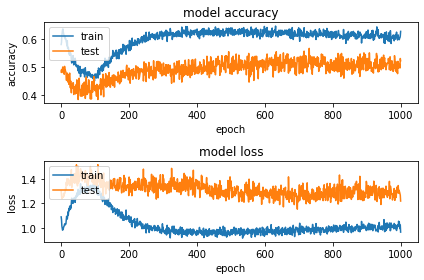

In [25]:
plt.figure(1)  
  
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left') 

plt.tight_layout()
plt.show()  